# *Projet P2: Analysez des données de systèmes éducatifs*

On souhaite étudier les possibilités de développement commercial à l´international.
Il s´agira de déterminer si le jeu de données peut informer les décisions d'ouverture vers de nouveaux pays

# Présentation du jeu de données

## Forme et qualité des données

On va regarder les nombres de lignes, colonnes et à quoi elles correspondent. Puis on simplifiera le jeu de données, en ne conservant que les informations interessantes pour l´étude.

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

In [4]:
data_origine = pd.read_csv('donnee/Projet_Python_Dataset_Edstats_csv/EdStatsData.csv')

### Description des lignes et des colonnes du jeu de données.

In [5]:
data_origine .shape ## nombre de lignes et de colonnes

(886930, 70)

In [6]:
data_origine.drop_duplicates().shape ## il n´y a pas de doublons

(886930, 70)

In [7]:
data_origine.head() ## jeu de données : pays, indicateurs et valeurs sur differentes années.

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,...,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
len(data_origine ["Indicator Name"].drop_duplicates()) ## nombre d´indicateurs

3665

In [9]:
len(data_origine ["Indicator Code"].drop_duplicates())

3665

In [10]:
len(data_origine ["Country Name"].drop_duplicates()) ## nombre de pays et regions

242

In [11]:
len(data_origine ["Country Code"].drop_duplicates())

242

In [12]:
data_origine .columns ## noms des colonnes

Index(['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code',
       '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977', '1978',
       '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986', '1987',
       '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995', '1996',
       '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004', '2005',
       '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014',
       '2015', '2016', '2017', '2020', '2025', '2030', '2035', '2040', '2045',
       '2050', '2055', '2060', '2065', '2070', '2075', '2080', '2085', '2090',
       '2095', '2100', 'Unnamed: 69'],
      dtype='object')

In [13]:
data_origine ["Country Name"].drop_duplicates()[0:25] ## nom des regions

0                                               Arab World
3665                                   East Asia & Pacific
7330           East Asia & Pacific (excluding high income)
10995                                            Euro area
14660                                Europe & Central Asia
18325        Europe & Central Asia (excluding high income)
21990                                       European Union
25655               Heavily indebted poor countries (HIPC)
29320                                          High income
32985                            Latin America & Caribbean
36650    Latin America & Caribbean (excluding high income)
40315         Least developed countries: UN classification
43980                                  Low & middle income
47645                                           Low income
51310                                  Lower middle income
54975                           Middle East & North Africa
58640    Middle East & North Africa (excluding high inc.

In [14]:
data_origine ["Country Name"].drop_duplicates()[25:] ## nom des pays

91625               Afghanistan
95290                   Albania
98955                   Algeria
102620           American Samoa
106285                  Andorra
                  ...          
868605    Virgin Islands (U.S.)
872270       West Bank and Gaza
875935              Yemen, Rep.
879600                   Zambia
883265                 Zimbabwe
Name: Country Name, Length: 217, dtype: object

In [15]:
data_origine['Unnamed: 69'].drop_duplicates()

0   NaN
Name: Unnamed: 69, dtype: float64

### On filtre le jeu de données pour conserver quelques colonnes années 

In [16]:
## On conserve toutes les colonnes années entre 2000 et 2050 
## et on supprime toutes les autres colonnes annees.
## liste_colonne_suppression contient les colonnes a supprimer
data = data_origine.copy()

## liste_colonne_suppression est la liste contenant les elements 
## a supprimer
## elle contient tous les noms de colonnes sauf celle que l´on veut garder 
## au final.
liste_colonne_suppression = data.columns.to_list()

debut = 2000
fin = 2050

index_1 = liste_colonne_suppression.index(str(debut))
index_2 = liste_colonne_suppression.index(str(fin))

# on supprime de la liste les colonnes entre 2000 et 2050
del liste_colonne_suppression[index_1:index_2+1]  

# on supprime de la liste "Indicator Name" et "Country Name.
del liste_colonne_suppression[2] 
del liste_colonne_suppression[0] 

data.drop( columns=liste_colonne_suppression, inplace=True ) 

On a réduit le nombre de colonnes

In [17]:
data.shape 

(886930, 27)

### On filtre  le jeu de données pour conserver quelques indicateurs

On fait une première selection d´indicateurs, et on regarde s´ils sont présents dans le jeu de données

In [18]:
indicateur_liste = [
    ## selection d´indicateurs classiques en fonctions des thematiques suivantes: 
    ## contexte socio-economique, depense gouvernementale et infrastructure(acces a internet)
"Population growth (annual %)", ## contexte socio-economique
"Population, total",
"Population, ages 10-14, total",
"Population of the official age for tertiary education, both sexes (number)" ,
"Population of the official age for secondary education, both sexes (number)" ,
"GNI per capita, Atlas method (current US$)",
"GNI per capita, PPP (current international $)",
"Government expenditure on education as % of GDP (%)", ## depense de l´etat
"Internet users (per 100 people)", ## infrastructure pour une visio-conference
"Proportion of upper secondary schools with access to electricity (%)",
"Proportion of secondary schools with access to Internet for pedagogical purposes (%)"
]

In [19]:
## creation du masque sur les indicateurs souhaités

condition_filtre_indicateur = data["Indicator Name"] == indicateur_liste[0] ## initialisation

for ind_indicateur in range(len(indicateur_liste)):
    ## operateur "or" pour additionner chaque condition associée a un indicateur.
    condition_filtre_indicateur |= data["Indicator Name"] == indicateur_liste[ind_indicateur]
    

In [20]:
data['Indicator Name'][condition_filtre_indicateur].drop_duplicates() ## indicateurs effectivement inclus dans data

1251           GNI per capita, Atlas method (current US$)
1252        GNI per capita, PPP (current international $)
1260    Government expenditure on education as % of GD...
1375                      Internet users (per 100 people)
2307                         Population growth (annual %)
2323    Population of the official age for secondary e...
2326    Population of the official age for tertiary ed...
2425                        Population, ages 10-14, total
2533                                    Population, total
Name: Indicator Name, dtype: object

On filtre suivant les indicateurs présents

In [21]:
data = data[condition_filtre_indicateur].copy()

On a réduit le nombre de lignes

In [22]:
data.shape

(2178, 27)

### Mise en forme du jeu de données, avec les années en ligne et les indicateurs en colonne.

In [23]:
## Creation d´un dataframe  (Ligne : nom  du pays, année. Colonne :indicateur) 

def f_colonne_indicateur(data,df,indicateur_list,condition_pays):
    """recupere les lignes indicateur de data
    et les met en colonne dans le dataframe df en sortie."""
    
    for indicateur in indicateur_list:

        condition_indicateur = data["Indicator Name"]==indicateur

        colonne_indicateur = data[ condition_pays & condition_indicateur ].iloc[0,2:].to_list()

        df[indicateur] = colonne_indicateur
    return df


pays_list = list(data.iloc[:,0].unique()) ## nom  des pays
indicateur_list = list(data.iloc[:,1].unique()) ## nom des indicateurs

longueur = len(data.iloc[0,2:])

## initialisation
index_pays = [pays_list[0]]*longueur
index_annee = [int(annee) for annee in data.iloc[0,2:].index]
df = pd.DataFrame([index_pays,index_annee],index=["Country Name","Annee"]).T

condition_pays = data["Country Name"]==pays_list[0]

df = f_colonne_indicateur(data,df,indicateur_list,condition_pays)

## boucle sur les pays
for pays in pays_list[1:]:
    index_pays = [pays]*longueur
    df_pays = pd.DataFrame([index_pays,index_annee],index=["Country Name","Annee"]).T

    condition_pays = data["Country Name"]==pays
    df_pays = f_colonne_indicateur(data,df_pays,indicateur_list,condition_pays)## boucle sur les indicateurs

    df = df.append(df_pays)

df.pivot_table(index=["Country Name","Annee"])

GNI per capita, Atlas method (current US$)  \
Country Name Annee                                               
Afghanistan  2000                                          NaN   
             2001                                          NaN   
             2002                                          NaN   
             2003                                          NaN   
             2004                                        210.0   
...                                                        ...   
Zimbabwe     2012                                        810.0   
             2013                                        890.0   
             2014                                        900.0   
             2015                                        890.0   
             2016                                        890.0   

                    GNI per capita, PPP (current international $)  \
Country Name Annee                                                  
Afghanistan  2000                                             NaN   
             2001                                             NaN   
             2002                                           870.0   
             2003                                           920.0   
             2004                                           920.0   
...                                                           ...   
Zimbabwe     2012                                          1610.0   
             2013                                          1750.0   
             2014                                          1790.0   
             2015                                          1790.0   
             2016                                          1810.0   

                    Government expenditure on education as % of GDP (%)  \
Country Name Annee                                                        
Afghanistan  2000                                                 NaN     
             2001                                                 NaN     
             2002                                                 NaN     
             2003                                                 NaN     
             2004                                                 NaN     
...                                                               ...     
Zimbabwe     2012                                             8.38322     
             2013                                             8.48536     
             2014                                             8.42933     
             2015                                                 NaN     
             2016                                                 NaN     

                    Internet users (per 100 people)  \
Country Name Annee                                    
Afghanistan  2000                               NaN   
             2001                          0.004723   
             2002                          0.004561   
             2003                          0.087891   
             2004                          0.105809   
...                                             ...   
Zimbabwe     2012                         12.000000   
             2013                         15.500000   
             2014                         16.364740   
             2015                         22.742818   
             2016                         23.119989   

                    Population growth (annual %)  \
Country Name Annee                                 
Afghanistan  2000                       3.494659   
             2001                       4.251504   
             2002                       4.720528   
             2003                       4.818041   
             2004                       4.468918   
...                                          ...   
Zimbabwe     2012                       2.228306   
             2013                       2.309366   
             2014                       2.344799   

On peut s´apercevoir que les années après 2016 n´apparaissent pas dans le tableau

In [24]:
df[df["Annee"]>2016].shape

(1936, 11)

In [25]:
df[df["Annee"]>2016].isna().sum() ## indicateur non renseigné sur chaque ligne

Country Name                                                                      0
Annee                                                                             0
GNI per capita, Atlas method (current US$)                                     1936
GNI per capita, PPP (current international $)                                  1936
Government expenditure on education as % of GDP (%)                            1936
Internet users (per 100 people)                                                1936
Population growth (annual %)                                                   1936
Population of the official age for secondary education, both sexes (number)    1936
Population of the official age for tertiary education, both sexes (number)     1936
Population, ages 10-14, total                                                  1936
Population, total                                                              1936
dtype: int64

Les indicateurs ne sont pas renseignés après 2016. On retire ces années du jeu de données.

In [26]:
df.shape

(6050, 11)

In [27]:
index_annee = df[df["Annee"]>2016].index ## on efface les lignes en utilisant cet index 

In [28]:
df.drop(index_annee, inplace=True)

In [29]:
df.shape

(4114, 11)

On crée un jeu de données correspondant pour les indicateurs statistiques classiques (moyenne, mediane, ecart-type). On  affiche les valeurs par régions, puis par pays.

In [30]:
df1 = df.pivot_table(index="Country Name",aggfunc=np.mean)
df1["Indicateur Statistique"] = "Moyenne"

df2 = df.pivot_table(index="Country Name",aggfunc=np.median)
df2["Indicateur Statistique"] = "Mediane"

df3 = df.pivot_table(index="Country Name",aggfunc=np.std)
df3["Indicateur Statistique"] = "Ecart type"

df_statistique = df1
df_statistique = df_statistique.append(df2)
df_statistique = df_statistique.append(df3)

In [31]:
## Creation d´un masque pour les regions et les pays souhaités

def f_liste_pays_regions(df,liste_regions,liste_pays):
    """a partir du dataframe df, liste_regions et liste_pays
    on calcule les masques pour les regions et les pays """
    
    condition_regions = df.index == liste_regions[0] ## initialisation
    condition_pays = df.index == liste_pays[0] ## initialisation

    ## regions
    for regions in liste_regions:
        ## operateur "or" pour additionner chaque condition associée a un indicateur.
        condition_regions |= df.index == regions

    ## pays
    for pays in liste_pays:
        ## operateur "or" pour additionner chaque condition associée a un indicateur.
        condition_pays |= df.index == pays
    return condition_regions,condition_pays

liste_regions = data_origine["Country Name"].drop_duplicates()[0:25].to_list() ## nom des regions
liste_pays = data_origine["Country Name"].drop_duplicates()[25:].to_list() ## nom des pays

[condition_regions_stat,condition_pays_stat] = f_liste_pays_regions(df_statistique,liste_regions,liste_pays)

In [32]:
## affichage par region
df_statistique[condition_regions_stat].pivot_table(index=["Country Name","Indicateur Statistique"])

GNI per capita, Atlas method (current US$)  \
Country Name        Indicateur Statistique                                               
Arab World          Ecart type                                             1681.479745   
                    Mediane                                                4112.095156   
                    Moyenne                                                4303.818493   
East Asia & Pacific Ecart type                                             2358.090929   
                    Mediane                                                6156.981550   
...                                                                                ...   
Upper middle income Mediane                                                4911.643310   
                    Moyenne                                                4991.705849   
World               Ecart type                                             2033.125281   
                    Mediane                                                8933.740832   
                    Moyenne                                                8385.077995   

                                            GNI per capita, PPP (current international $)  \
Country Name        Indicateur Statistique                                                  
Arab World          Ecart type                                                2534.790408   
                    Mediane                                                  12744.775359   
                    Moyenne                                                  12405.340212   
East Asia & Pacific Ecart type                                                3728.712855   
                    Mediane                                                  10405.054186   
...                                                                                   ...   
Upper middle income Mediane                                                  10699.926004   
                    Moyenne                                                  10519.508625   
World               Ecart type                                                2764.461428   
                    Mediane                                                  12101.453303   
                    Moyenne                                                  11851.870414   

                                            Internet users (per 100 people)  \
Country Name        Indicateur Statistique                                    
Arab World          Ecart type                                    12.517633   
                    Mediane                                       12.930275   
                    Moyenne                                       15.657524   
East Asia & Pacific Ecart type                                    16.187558   
                    Mediane                                       25.253566   
...                                                                     ...   
Upper middle income Mediane                                       23.493783   
                    Moyenne                                       26.158184   
World               Ecart type                                    12.592971   
                    Mediane                                       23.067025   
                    Moyenne                                       24.396040   

                                            Population growth (annual %)  \
Country Name        Indicateur Statistique                                 
Arab World          Ecart type                                  0.123658   
                    Mediane                                     2.222642   
                    Moyenne                                     2.219893   
East Asia & Pacific Ecart type                                  0.086627   
                    Mediane                                     0.707903   
...                                                                  ...   
Upper middle income Mediane

In [33]:
## affichage par pays
df_statistique[condition_pays_stat].pivot_table(index=["Country Name","Indicateur Statistique"])

GNI per capita, Atlas method (current US$)  \
Country Name Indicateur Statistique                                               
Afghanistan  Ecart type                                              164.994172   
             Mediane                                                 500.000000   
             Moyenne                                                 466.923077   
Albania      Ecart type                                             1264.446810   
             Mediane                                                3950.000000   
...                                                                         ...   
Zambia       Mediane                                                1160.000000   
             Moyenne                                                1013.529412   
Zimbabwe     Ecart type                                              216.596331   
             Mediane                                                 490.000000   
             Moyenne                                                 575.294118   

                                     GNI per capita, PPP (current international $)  \
Country Name Indicateur Statistique                                                  
Afghanistan  Ecart type                                                 413.092864   
             Mediane                                                   1490.000000   
             Moyenne                                                   1432.000000   
Albania      Ecart type                                                2623.721678   
             Mediane                                                   8270.000000   
...                                                                            ...   
Zambia       Mediane                                                   2550.000000   
             Moyenne                                                   2672.352941   
Zimbabwe     Ecart type                                                 290.497798   
             Mediane                                                   1550.000000   
             Moyenne                                                   1554.705882   

                                     Government expenditure on education as % of GDP (%)  \
Country Name Indicateur Statistique                                                        
Afghanistan  Ecart type                                                       0.423992     
             Mediane                                                          3.450315     
             Moyenne                                                          3.334565     
Albania      Ecart type                                                       0.149806     
             Mediane                                                          3.237910     
...                                                                                ...     
Zambia       Mediane                                                          1.735530     
             Moyenne                                                          1.665526     
Zimbabwe     Ecart type                                                       3.229923     
             Mediane                                                          8.406275     
             Moyenne                                                          6.817810     

                                     Internet users (per 100 people)  \
Country Name Indicateur Statistique                                    
Afghanistan  Ecart type                                     3.238375   
             Mediane                                        2.828562   
             Moyenne                                        3.564658   
Albania      Ecart type                                    26.083970   
             Mediane                                       23.860000   
...                                                              ...   
Zambia       Mediane                                        5.550

Pour situer les choses, quelques ordres de grandeurs pour une selection de pays

In [34]:
df_statistique_presentation = df_statistique.loc[["Korea, Rep.","France","Finland","Singapore","United States"]].pivot_table(index=["Country Name","Indicateur Statistique"]).copy()

In [35]:
liste_colonne_statistique=[
    "GNI per capita, PPP (current international $)",
    "Government expenditure on education as % of GDP (%)",
    "Internet users (per 100 people)",
    "Population, total"]

df_statistique_presentation = df_statistique_presentation[liste_colonne_statistique]

## on arrondi les chiffres pour etre plus lisible
df_statistique_presentation.iloc[:,0] = [int(value) for value in df_statistique_presentation.iloc[:,0].round(-3)]
df_statistique_presentation.iloc[:,1] = df_statistique_presentation.iloc[:,1].round(1)
df_statistique_presentation.iloc[:,2] = [int(value) for value in df_statistique_presentation.iloc[:,2].round(0)]
df_statistique_presentation.iloc[:,3] = [int(value) for value in df_statistique_presentation.iloc[:,3].round(-5)]
df_statistique_presentation.rename(columns={"Government expenditure on education as % of GDP (%)":"Expenditures % of GDP (%)",
                                           "GNI per capita, PPP (current international $)":"GNI per capita, PPP (current international $)",
                                           "Internet users (per 100 people)":"Internet users (per 100 people)"})

GNI per capita, PPP (current international $)  \
Country Name  Indicateur Statistique                                                  
Finland       Ecart type                                                       6000   
              Mediane                                                         38000   
              Moyenne                                                         36000   
France        Ecart type                                                       5000   
              Mediane                                                         35000   
              Moyenne                                                         35000   
Korea, Rep.   Ecart type                                                       6000   
              Mediane                                                         28000   
              Moyenne                                                         27000   
Singapore     Ecart type                                                      16000   
              Mediane                                                         61000   
              Moyenne                                                         62000   
United States Ecart type                                                       7000   
              Mediane                                                         48000   
              Moyenne                                                         48000   

                                      Expenditures % of GDP (%)  \
Country Name  Indicateur Statistique                              
Finland       Ecart type                                    0.5   
              Mediane                                       6.2   
              Moyenne                                       6.3   
France        Ecart type                                    0.1   
              Mediane                                       5.5   
              Moyenne                                       5.5   
Korea, Rep.   Ecart type                                    0.4   
              Mediane                                       4.1   
              Moyenne                                       4.2   
Singapore     Ecart type                                    0.4   
              Mediane                                       3.1   
              Moyenne                                       3.3   
United States Ecart type                                    0.2   
              Mediane                                       5.3   
              Moyenne                                       5.3   

                                      Internet users (per 100 people)  \
Country Name  Indicateur Statistique                                    
Finland       Ecart type                                           16   
              Mediane                                              82   
              Moyenne                                              77   
France        Ecart type                                           24   
              Mediane                                              71   
              Moyenne                                              60   
Korea, Rep.   Ecart type                                           13   
              Mediane                                              81   
              Moyenne                                              76   
Singapore     Ecart type                                           14   
              Mediane                                              69   
              Moyenne                                              65   
United States Ecart type                                            9   
              Mediane                                              71   
              Moyenne                                              67   

                                      Population, total  
Country Name  Indicateur Statistique                     
Finland       Ecart type                         100000  
  

Apres ces filtrages, on obtient un jeu de données df : 

In [36]:
condition = df["Country Name"]==liste_pays[0]
for pays in liste_pays:
    condition |= df["Country Name"]==pays
df=df[condition]
df.shape

(3689, 11)

In [37]:
df_pays_annee = df.copy()

## Qualité des données

On cherche à renseigner le nombre de valeurs manquantes du jeu de données

### Taux de remplissage par pays et par indicateur

In [38]:
def f_remplissage_str(serie):
    """calcul du nombre de valeur manquantes
    a partir de la serie, on recupere une chaine de caractere en sortie """
    longueur_vecteur_annee = len(serie)
    return str(int(pd.notna(serie).sum()/longueur_vecteur_annee*100))+" %"

In [39]:
def f_remplissage(serie):
    """calcul du nombre de valeur manquantes
    a partir de la serie, on recupere un entier en sortie """
    longueur_vecteur_annee = len(serie)
    return int(pd.notna(serie).sum()/longueur_vecteur_annee*100)

In [40]:
## taux de remplissage des données par pays et indicateurs
df.pivot_table(index='Country Name',aggfunc=f_remplissage_str).iloc[:,1:]

,"GNI per capita, Atlas method (current US$)","GNI per capita, PPP (current international $)",Government expenditure on education as % of GDP (%),Internet users (per 100 people),Population growth (annual %),"Population of the official age for secondary education, both sexes (number)","Population of the official age for tertiary education, both sexes (number)","Population, ages 10-14, total","Population, total"
Country Name,,,,,,,,,
Afghanistan,76 %,88 %,35 %,94 %,100 %,94 %,94 %,94 %,100 %
Albania,100 %,100 %,52 %,100 %,100 %,100 %,94 %,94 %,100 %
Algeria,100 %,100 %,5 %,100 %,100 %,94 %,94 %,94 %,100 %
American Samoa,0 %,0 %,0 %,0 %,100 %,0 %,0 %,0 %,100 %
Andorra,0 %,0 %,70 %,94 %,100 %,0 %,0 %,41 %,100 %
...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),0 %,0 %,0 %,100 %,100 %,0 %,0 %,0 %,100 %
West Bank and Gaza,100 %,0 %,29 %,100 %,100 %,94 %,94 %,94 %,100 %
"Yemen, Rep.",100 %,100 %,17 %,100 %,100 %,94 %,88 %,94 %,100 %


In [41]:
df_remplissage = df.pivot_table(index='Country Name',aggfunc=f_remplissage)

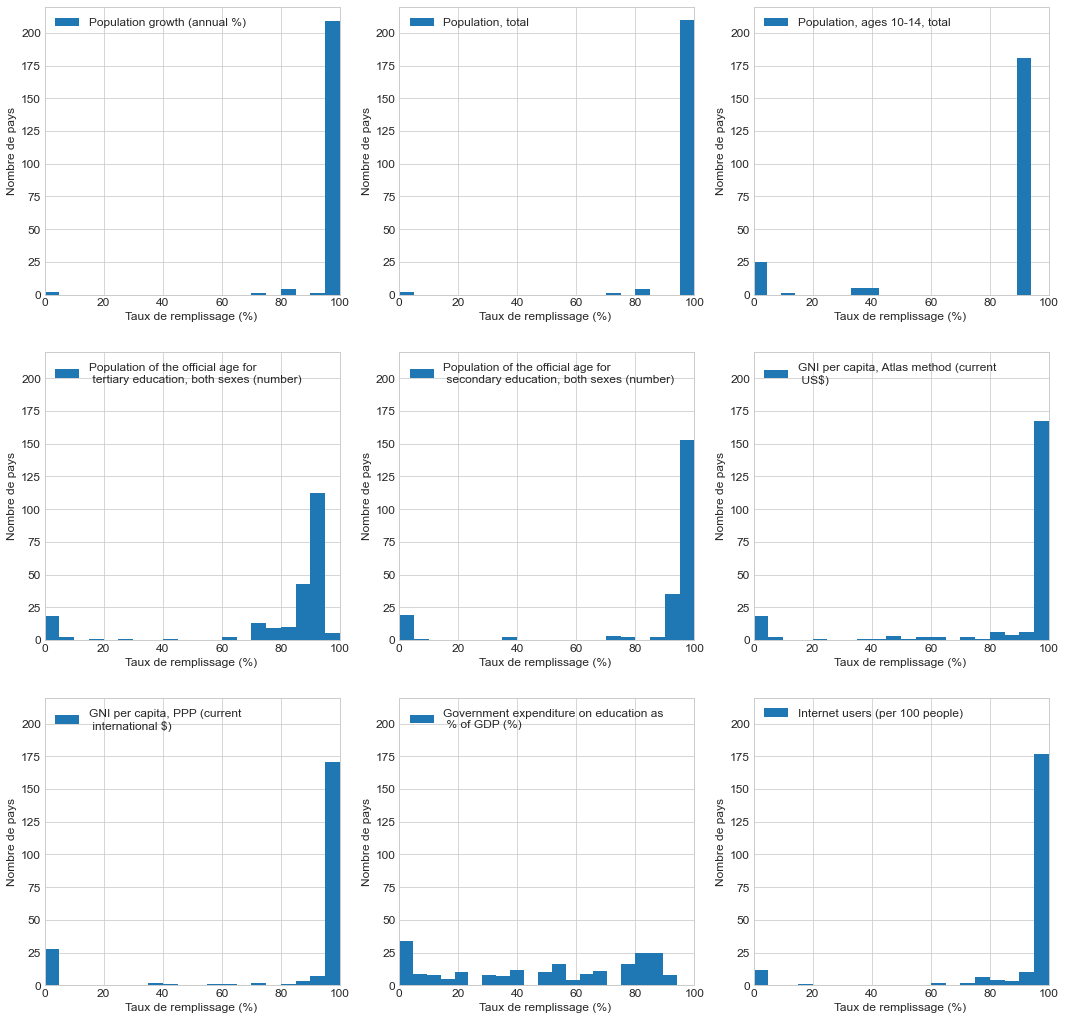

In [42]:
## Graphique
## Taux de remplissage par indicateur, repartition par nombre de pays
plt.rcParams.update({'font.size': 12})
fig = plt.figure(figsize=(18,18)) 
for i in range(9):
    
    fig.add_subplot(3,3,i+1)
    
    titre = indicateur_liste[i]
    
    if len(titre)>40:
        espace = titre[:40].rfind(" ")
        titre = indicateur_liste[i][:espace]+"\n"+indicateur_liste[i][espace:]
    
    ax = df_remplissage[indicateur_liste[i]].hist(bins=20,label=titre)
    
    plt.legend(loc='upper left');
    plt.axis([0, 100,0, 220])
    
    ax.set(xlabel='Taux de remplissage (%) ', ylabel='Nombre de pays')
    

In [43]:
## indicateur retenu
indicateur_liste = [
"Population, ages 10-14, total", ## contexte socio-economique
"Population, total",
"GNI per capita, PPP (current international $)",
"Government expenditure on education as % of GDP (%)", ## depense de l´etat
"Internet users (per 100 people)", ## infrastructure pour une visio-conference
]

In [44]:
## pour simplifier , on ne conserve pas ces colonnes
del df["GNI per capita, Atlas method (current US$)"]
del df["Population growth (annual %)"]
del df["Population of the official age for secondary education, both sexes (number)"]
del df["Population of the official age for tertiary education, both sexes (number)"]

In [45]:
## On prend la derniere valeur renseignée dans chaque colonne du jeu de donnee
## pour minimiser le nombre de valeurs manquantes.
def f_derniere_valeur(serie):
    index_ligne = serie.last_valid_index()
    if index_ligne is None:
        indicateur = np.nan
    else:
        indicateur = serie.loc[index_ligne]
    return indicateur

In [46]:
def f_derniere_valeur_annee(serie,annee):
    index_ligne = serie.last_valid_index()
    if index_ligne is None:
        valeur_annee = np.nan
    else:
        valeur_annee = int(annee.loc[index_ligne])
    return valeur_annee

In [47]:
## On ajoute une colonne annee pour chaque indicateur
for nom_pays in liste_pays:
    condition_pays = df["Country Name"]==nom_pays

    for nom_indicateur in indicateur_liste:
        index_ligne = df.loc[condition_pays,nom_indicateur].last_valid_index()
        df.loc[condition_pays,"Annee "+nom_indicateur] = f_derniere_valeur_annee( df.loc[condition_pays,nom_indicateur],
                                                                              df.loc[condition_pays,"Annee"] )

In [48]:
## On recupere la valeur de chaque indicateur population
## pour la derniere année commune renseignée.
## Cela permettra de faire des calculs avec des indicateurs de population 
## de la meme année.
nom_pop = "Population, ages 10-14, total"
nom_pop_total = "Population, total"
for nom_pays in liste_pays:
    condition_pays = df["Country Name"]==nom_pays

    annee_pop = df[condition_pays]["Annee "+nom_pop][0]
    annee_pop_total = df[condition_pays]["Annee "+nom_pop_total][0] 
    
    if ~np.isnan(annee_pop) and ~np.isnan(annee_pop_total):
        if  annee_pop != annee_pop_total:

            annee_min = int(min(annee_pop,annee_pop_total))
            condition_annee = df["Annee"]== annee_min

            df.loc[condition_pays, nom_pop_total] = df[condition_pays&condition_annee][nom_pop_total].iloc[0]
            df.loc[condition_pays, nom_pop] = df[condition_pays&condition_annee][nom_pop].iloc[0]
            df.loc[condition_pays, "Annee "+nom_pop] = annee_min
            df.loc[condition_pays, "Annee "+nom_pop_total] = annee_min


In [49]:
## creation d´une colonne "Population" susceptible d´être interessée par les 
## cours du secondaire/tertiaire.
df["Population"] = df["Population, total"] - df["Population, ages 10-14, total"]

In [50]:
df

,Country Name,Annee,"GNI per capita, PPP (current international $)",Government expenditure on education as % of GDP (%),Internet users (per 100 people),"Population, ages 10-14, total","Population, total","Annee Population, ages 10-14, total","Annee Population, total","Annee GNI per capita, PPP (current international $)",Annee Government expenditure on education as % of GDP (%),Annee Internet users (per 100 people),Population
0,Afghanistan,2000,NaN,NaN,NaN,4530371.0,33736494.0,2015.0,2015.0,2016.0,2015.0,2016.0,29206123.0
1,Afghanistan,2001,NaN,NaN,0.004723,4530371.0,33736494.0,2015.0,2015.0,2016.0,2015.0,2016.0,29206123.0
2,Afghanistan,2002,870.0,NaN,0.004561,4530371.0,33736494.0,2015.0,2015.0,2016.0,2015.0,2016.0,29206123.0
3,Afghanistan,2003,920.0,NaN,0.087891,4530371.0,33736494.0,2015.0,2015.0,2016.0,2015.0,2016.0,29206123.0
4,Afghanistan,2004,920.0,NaN,0.105809,4530371.0,33736494.0,2015.0,2015.0,2016.0,2015.0,2016.0,29206123.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12,Zimbabwe,2012,1610.0,8.38322,12.000000,1632139.0,15777451.0,2015.0,2015.0,2016.0,2014.0,2016.0,14145312.0
13,Zimbabwe,2013,1750.0,8.48536,15.500000,1632139.0,15777451.0,2015.0,2015.0,2016.0,2014.0,2016.0,14145312.0
14,Zimbabwe,2014,1790.0,8.42933,16.364740,1632139.0,15777451.0,2015.0,2015.0,2016.0,2014.0,2016.0,14145312.0
15,Zimbabwe,2015,1790.0,NaN,22.742818,1632139.0,15777451.0,2015.0,2015.0,2016.0,2014.0,2016.0,14145312.0


In [51]:
df = df.pivot_table(index='Country Name',aggfunc=f_derniere_valeur)

In [52]:
df

,Annee,"Annee GNI per capita, PPP (current international $)",Annee Government expenditure on education as % of GDP (%),Annee Internet users (per 100 people),"Annee Population, ages 10-14, total","Annee Population, total","GNI per capita, PPP (current international $)",Government expenditure on education as % of GDP (%),Internet users (per 100 people),Population,"Population, ages 10-14, total","Population, total"
Country Name,,,,,,,,,,,,
Afghanistan,2016,2016.0,2015.0,2016.0,2015.0,2015.0,1900.0,3.31754,10.595726,29206123.0,4530371.0,33736494.0
Albania,2016,2016.0,2013.0,2016.0,2015.0,2015.0,11670.0,3.53944,66.363445,2633183.0,247520.0,2880703.0
Algeria,2016,2016.0,2008.0,2016.0,2015.0,2015.0,14420.0,4.35425,42.945527,36743373.0,3128155.0,39871528.0
American Samoa,2016,NaN,NaN,NaN,NaN,2016.0,NaN,NaN,NaN,NaN,NaN,55599.0
Andorra,2016,NaN,2015.0,2016.0,2006.0,2006.0,NaN,3.25368,97.930637,77079.0,3912.0,80991.0
...,...,...,...,...,...,...,...,...,...,...,...,...
Virgin Islands (U.S.),2016,NaN,NaN,2016.0,NaN,2016.0,NaN,NaN,59.608316,NaN,NaN,102951.0
West Bank and Gaza,2016,NaN,2015.0,2016.0,2015.0,2015.0,NaN,1.32232,61.178385,3768131.0,654012.0,4422143.0
"Yemen, Rep.",2016,2016.0,2008.0,2016.0,2015.0,2015.0,2500.0,5.14743,24.579208,23452544.0,3463663.0,26916207.0


Il reste quelques valeurs non renseignées.

In [53]:
df.loc[:,~df.columns.str.contains("Annee")].isna().sum()

GNI per capita, PPP (current international $)          28
Government expenditure on education as % of GDP (%)    34
Internet users (per 100 people)                        12
Population                                             25
Population, ages 10-14, total                          25
Population, total                                       2
dtype: int64

On filtre une dernière fois, cette fois-ci en utilisant un seuil minimum sur la population cible.

In [54]:
filtre_population = df["Population"]>1e5 ## seuil pour un nombre minimal de la population

In [55]:
df[~filtre_population].index## les pays non pris en compte dans l´etude

Index(['American Samoa', 'Andorra', 'Antigua and Barbuda', 'Aruba', 'Bermuda',
       'British Virgin Islands', 'Cayman Islands', 'Channel Islands',
       'Curacao', 'Dominica', 'Faroe Islands', 'French Polynesia', 'Gibraltar',
       'Greenland', 'Grenada', 'Guam', 'Isle of Man', 'Kiribati', 'Kosovo',
       'Liechtenstein', 'Marshall Islands', 'Micronesia, Fed. Sts.', 'Monaco',
       'Montenegro', 'Nauru', 'New Caledonia', 'Northern Mariana Islands',
       'Palau', 'Puerto Rico', 'San Marino', 'Serbia', 'Seychelles',
       'Sint Maarten (Dutch part)', 'South Sudan', 'St. Kitts and Nevis',
       'St. Martin (French part)', 'St. Vincent and the Grenadines', 'Tonga',
       'Turks and Caicos Islands', 'Tuvalu', 'Virgin Islands (U.S.)'],
      dtype='object', name='Country Name')

In [56]:
df = df.drop(index = df[~filtre_population].index) ## on les retire du jeu de donnees

In [57]:
df.loc[:,~df.columns.str.contains("Annee")].isna().sum() ## il reste quelques pays avec des valeurs manquantes

GNI per capita, PPP (current international $)           5
Government expenditure on education as % of GDP (%)    15
Internet users (per 100 people)                         0
Population                                              0
Population, ages 10-14, total                           0
Population, total                                       0
dtype: int64

In [58]:
df[df["Government expenditure on education as % of GDP (%)"].isna()].index ## le nom des pays avec valeur manquante

Index(['Bosnia and Herzegovina', 'China', 'Equatorial Guinea', 'Haiti', 'Iraq',
       'Jordan', 'Korea, Dem. People’s Rep.', 'Libya', 'Myanmar', 'Nigeria',
       'Papua New Guinea', 'Somalia', 'Suriname', 'United Arab Emirates',
       'Uzbekistan'],
      dtype='object', name='Country Name')

In [59]:
df[df["GNI per capita, PPP (current international $)"].isna()].index ## le nom des pays avec valeur manquante

Index(['Cuba', 'Korea, Dem. People’s Rep.', 'Somalia', 'Syrian Arab Republic',
       'West Bank and Gaza'],
      dtype='object', name='Country Name')

Apres filtrage il reste 176 pays dans l´étude dont 156 renseignants tous les indicateurs. 

In [60]:
df.shape

(176, 12)

In [61]:
df.loc[:,~df.columns.str.contains("Annee")].describe()

,"GNI per capita, PPP (current international $)",Government expenditure on education as % of GDP (%),Internet users (per 100 people),Population,"Population, ages 10-14, total","Population, total"
count,171.000000,161.000000,176.000000,1.760000e+02,1.760000e+02,1.760000e+02
mean,19701.520468,4.705684,48.548751,3.804140e+07,3.455935e+06,4.149734e+07
std,21546.587229,1.905731,28.604193,1.356208e+08,1.174672e+07,1.470337e+08
min,700.000000,1.099720,0.000000,1.625550e+05,1.465100e+04,1.772060e+05
25%,3820.000000,3.294810,23.945000,3.075022e+06,2.405842e+05,3.317883e+06
50%,11990.000000,4.612500,48.108776,9.076174e+06,7.161660e+05,9.724264e+06
75%,26930.000000,5.527380,75.124626,2.805552e+07,2.726654e+06,3.083115e+07
max,125000.000000,12.837270,98.240016,1.286587e+09,1.238859e+08,1.371220e+09


## Quelques exemples pour situer les données

### Tableau pays vs indicateurs

In [62]:
## tableau avec quelques pays pour une presentation des ordres de grandeurs.
pays_presentation=[
    "France",
    "United States",
    "Singapore",
    "Korea, Rep.",
    "Finland"]
condition_pays_presentation = df.index==pays_presentation[0]
for pays in pays_presentation:
    condition_pays_presentation |= df.index==pays

In [63]:
df_presentation = df[condition_pays_presentation].copy()

In [64]:
## mise en forme des chiffres
df_presentation.loc[:,"GNI per capita, PPP (current international $)"] = round(df_presentation.loc[:,"GNI per capita, PPP (current international $)"],-3).astype('int')
df_presentation.loc[:,"Government expenditure on education as % of GDP (%)"] = round(df_presentation.loc[:,"Government expenditure on education as % of GDP (%)"],1)
df_presentation.loc[:,"Internet users (per 100 people)"] = round(df_presentation.loc[:,"Internet users (per 100 people)"]).astype('int')
df_presentation.loc[:,"Population, total"] = round(df_presentation.loc[:,"Population, total"],-5).astype('int')

df_presentation.loc[:,["GNI per capita, PPP (current international $)",
                       "Annee GNI per capita, PPP (current international $)",
                       "Government expenditure on education as % of GDP (%)",
                       "Annee Government expenditure on education as % of GDP (%)",
                       "Internet users (per 100 people)",
                       "Annee Internet users (per 100 people)",
                       "Population, total",
                       "Annee Population, total"]]

,"GNI per capita, PPP (current international $)","Annee GNI per capita, PPP (current international $)",Government expenditure on education as % of GDP (%),Annee Government expenditure on education as % of GDP (%),Internet users (per 100 people),Annee Internet users (per 100 people),"Population, total","Annee Population, total"
Country Name,,,,,,,,
Finland,44000,2016.0,7.2,2014.0,88,2016.0,5500000,2015.0
France,42000,2016.0,5.5,2013.0,86,2016.0,66600000,2015.0
"Korea, Rep.",36000,2016.0,5.1,2015.0,93,2016.0,51000000,2015.0
Singapore,85000,2016.0,2.9,2013.0,81,2016.0,5500000,2015.0
United States,59000,2016.0,5.4,2014.0,76,2016.0,320900000,2015.0


### Graphique revenu par habitant

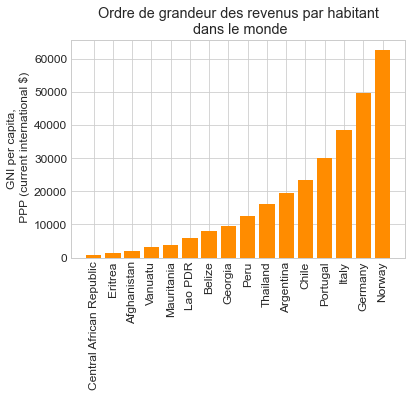

In [65]:
## graphique pour illustrer les ordres de grandeurs du revenu par habitant
var_y = df[~df["Government expenditure on education as % of GDP (%)"].isna() & ~df["GNI per capita, PPP (current international $)"].isna()]["GNI per capita, PPP (current international $)"].sort_values()[::10]
plt.bar(range(len(var_y)),var_y,color="darkorange")
plt.xticks(range(len((var_y))),var_y.index,rotation=90);
plt.title(" Ordre de grandeur des revenus par habitant \n dans le monde")
plt.ylabel("GNI per capita,\n PPP (current international $)")
plt.rcParams.update({'font.size': 12})

In [66]:
## le revenu est tres dispersé
df["GNI per capita, PPP (current international $)"].describe()

count       171.000000
mean      19701.520468
std       21546.587229
min         700.000000
25%        3820.000000
50%       11990.000000
75%       26930.000000
max      125000.000000
Name: GNI per capita, PPP (current international $), dtype: float64

In [67]:
## seuil:  80% des pays ont un revenu par habitant (PPA) en dessous de cette valeur.
df["GNI per capita, PPP (current international $)"].dropna().sort_values()[[int(156*0.8)]]

Country Name
Hungary    25640.0
Name: GNI per capita, PPP (current international $), dtype: float64

### Acces a internet

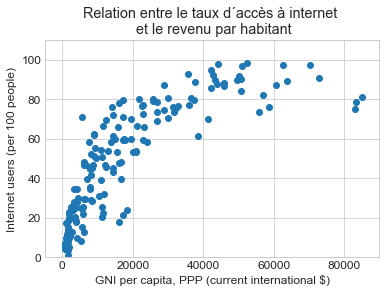

In [68]:
## graphique: relation entre taux d´acces à internet et le revenu par habitant
plt.scatter(df["GNI per capita, PPP (current international $)"],df["Internet users (per 100 people)"],)
plt.title("Relation entre le taux d´accès à internet \n et le revenu par habitant")
plt.ylabel("Internet users (per 100 people)")
plt.xlabel("GNI per capita, PPP (current international $)")
plt.axis([-5000,90000,0,110])
plt.show()

## Analyse

### Préparation aux traitements

On normalise les indicateurs choisis, puis on fait la moyenne pour obtenir un score par pays.

In [69]:
def f_norme(colonne):
    """normalisation des indicateurs
    on ramene les vecteurs sur une echelle comparable pour pouvoir faire une moyenne avec eux."""
    
    return (colonne-colonne.min())/(colonne.max()-colonne.min())## ramene les valeurs entre 0 et 1

##    return colonne/np.sqrt(np.sum(colonne**2)) ## divise chaque vecteur par sa norme
##    return (colonne-colonne.mean())/(colonne.std()) ## centre sur la moyenne et normalise l´écart-type

In [70]:
## indicateur retenu
indicateur_liste = [
"Population",
"GNI per capita, PPP (current international $)",
"Government expenditure on education as % of GDP (%)", 
"Internet users (per 100 people)",
]

On utilise le log du revenu (plutot que le revenu uniquement) pour avoir des dispersions moins discriminantes par rapport aux autres indicateurs.

In [71]:
df["GNI per capita, PPP (current international $)"] = np.log(df["GNI per capita, PPP (current international $)"])

On normalise les indicateurs

In [72]:
## creation des indicateurs normalisés
for indicateur in indicateur_liste:
    nouvelle_colonne = "Indicateur " + indicateur
    df[nouvelle_colonne] = f_norme(df[indicateur])

score = np.power(
    ( df["Indicateur " +indicateur_liste[0]]
     *df["Indicateur " +indicateur_liste[1]]
     *df["Indicateur " +indicateur_liste[2]]
     *df["Indicateur " +indicateur_liste[3]] )
    ,1/4) ## valeur moyenne geometrique des quatres indicateurs
df["Score"] = score

In [73]:
## contribution des indicateurs sur le score final
score_par_indicateur = []
for indicateur in indicateur_liste:
    nom = "Indicateur " + indicateur
    score_par_indicateur.append(1/4*df[nom])

pd.DataFrame(score_par_indicateur, index=indicateur_liste).T.describe()

,Population,"GNI per capita, PPP (current international $)",Government expenditure on education as % of GDP (%),Internet users (per 100 people)
count,176.000000,171.000000,161.000000,176.000000
mean,0.007361,0.130518,0.076804,0.123546
std,0.026356,0.059300,0.040590,0.072792
min,0.000000,0.000000,0.000000,0.000000
25%,0.000566,0.081818,0.046754,0.060935
50%,0.001732,0.136970,0.074819,0.122427
75%,0.005421,0.175985,0.094305,0.191176
max,0.250000,0.250000,0.250000,0.250000


### Score d´attractivité

Peut-on repondre aux questions suivantes :
    
- Quels sont les pays avec un fort potentiel de clients pour nos services ?
- Pour chacun de ces pays, quelle sera l’évolution de ce potentiel de clients ?
- Dans quels pays l'entreprise doit-elle opérer en priorité ?
    
    

Le score d´attractivité

Moyenne 0.149
Mediane 0.129
Premier decile 0.059
Dernier decile 0.276


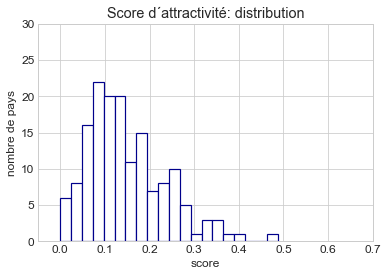

In [74]:
## Statistiques sur le score
df["Score"].dropna().hist(bins=20,color='white',edgecolor='darkblue',linewidth=1.2)
plt.axis([-0.05,0.7,0,30])
plt.title("Score d´attractivité: distribution")
plt.xlabel("score");
plt.ylabel("nombre de pays");

plt.rcParams.update({'font.size': 12})

print("Moyenne {}".format(round(df["Score"].dropna().mean(),3)))
print("Mediane {}".format(round(df["Score"].dropna().median(),3)))
print("Premier decile {}".format(round(df["Score"].dropna().sort_values()[17],3)))
print("Dernier decile {}".format(round(df["Score"].dropna().sort_values()[162-17],3)))

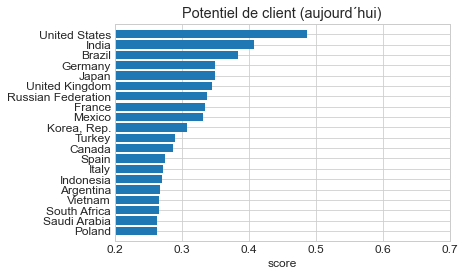

In [75]:
## graphique du classement
nb_pays = 20
serie_initiale = score.dropna().sort_values()[-nb_pays:]
ax = plt.barh(range(nb_pays),serie_initiale)
plt.yticks(range(nb_pays),score.dropna().sort_values()[-nb_pays:].index)
plt.axis([0.2,0.7,-1,nb_pays])
plt.title("Potentiel de client (aujourd´hui)")
plt.xlabel("score");
plt.rcParams.update({'font.size': 12})

In [76]:
liste_pays_classement = serie_initiale.sort_values(ascending=False).index.to_list()

Quel score demain ?

In [77]:
## le potentiel de demain 
## on suppose que la majorité des gens a acces a internet
## et on prends en compte la population agée de 10 a 14 ans
liste_pays_cible = df["Score"].dropna().sort_values()[:-20:-1].index.to_list()

condition = df.index == liste_pays_cible[0]

for pays in liste_pays_cible:
    condition |= df.index==pays

## ajout de la population de 10 a 14 ans
population_total = df[indicateur_liste[0]]
population_ados = df["Population, ages 10-14, total"]

df["Indicateur " +indicateur_liste[0]]= f_norme(population_total)
+ f_norme(population_ados) * (population_ados.max()-population_ados.min())/(population_total.max()-population_total.min())

## on suppose que tout le monde a internet
df["Indicateur Internet users (per 100 people)"] = 1

## valeur moyenne geometrique des quatres indicateurs
score_avenir = np.power(
    ( df["Indicateur " +indicateur_liste[0]]
     *df["Indicateur " +indicateur_liste[1]]
     *df["Indicateur " +indicateur_liste[2]]
     *df["Indicateur " +indicateur_liste[3]] )
    ,1/4 )
df["Score Avenir"] = score_avenir

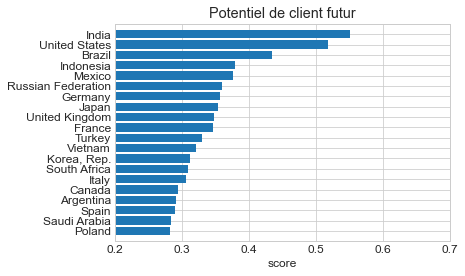

In [78]:
## graphique pour le potentiel avenir
nb_pays = 20
ax = plt.barh(range(nb_pays),df.loc[serie_initiale.index]["Score Avenir"].sort_values())
plt.yticks(range(nb_pays),df.loc[serie_initiale.index]["Score Avenir"].sort_values().index)
plt.axis([0.2,0.7,-1,nb_pays])
plt.title("Potentiel de client futur")
plt.xlabel("score");
plt.rcParams.update({'font.size': 12})

Variation du score entre aujourd´hui et demain

In [79]:
## calcul de la variation du score
evolution_score = df["Score Avenir"] - df["Score"]

In [80]:
## nouvelle colonne du dataframe df
evolution_serie = evolution_score[df["Score"].dropna().sort_values().index].round(3) ## arrondi a la premiere decimale
df["Evolution score"] = evolution_serie

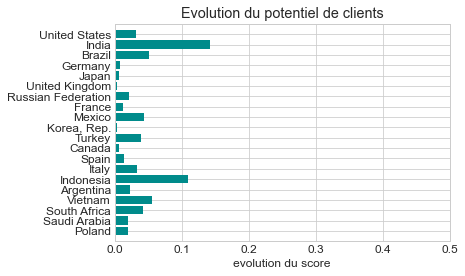

In [81]:
## graphique pour l´evolution du score
nb_pays = 20
serie_initiale = df["Score"].dropna().sort_values()[-nb_pays:]
ax = plt.barh(range(nb_pays), evolution_serie[serie_initiale.index],color="darkcyan")
plt.yticks(range(nb_pays),serie_initiale.index)
plt.axis([0,0.5,-1,nb_pays])
plt.title("Evolution du potentiel de clients")
plt.xlabel("evolution du score");
plt.rcParams.update({'font.size': 12})

Observation et évaluation des hypothèses : on represente l´evolution dans le temps des indicateurs sur les premiers pays

In [82]:
def f_graphique_evolution_indicateur(nom_indicateur,df,liste_pays_classement):
    """trace le graphique indicateur vs annee pour quelques pays"""
      
    liste_pays_classement.append("France")
    liste_pays_classement.append("Indonesia")
    liste_handle = []
    for pays in liste_pays_classement:

        if ~np.isnan(df[df["Country Name"]==pays][nom_indicateur]).all():
            df_annee = df[df["Country Name"]==pays].pivot_table(index=["Annee"])
            var_y = df_annee[nom_indicateur]
            p_graph, = plt.plot(var_y.index,var_y,label=pays)
            liste_handle.append(p_graph)
            
        
        plt.xlabel("Annee")
        plt.ylabel(nom_indicateur)
        plt.title("Evolution de l´indicateur:\n"+nom_indicateur)
        plt.legend(handles=liste_handle,bbox_to_anchor=(1.05, 1), loc='upper left')

Revenu par habitant: On observe deux groupes de pays (Bresil, Inde, Indonesie)

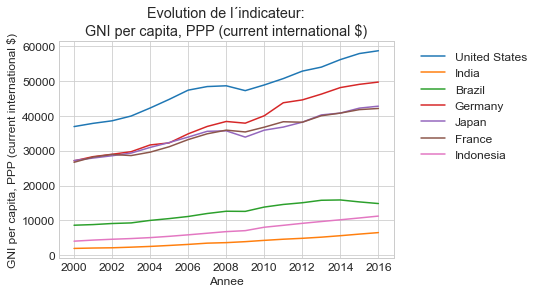

In [83]:
f_graphique_evolution_indicateur("GNI per capita, PPP (current international $)",df_pays_annee,liste_pays_classement[:5])

Utilisation d´internet: Le Bresil a evolué de 40% entre 2004 et 2014, si l´Indonesie et l´Inde suivent ce rythme, ils pourront rattraper les economies des pays a haut revenus en moins de 15 ans (2030). 

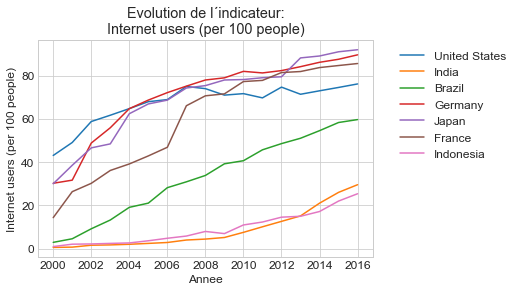

In [84]:
f_graphique_evolution_indicateur("Internet users (per 100 people)",df_pays_annee,liste_pays_classement[:5])

Depenses educatives gouvernementales: Les evolutions sont assez proches d´année en année sauf pour le Bresil

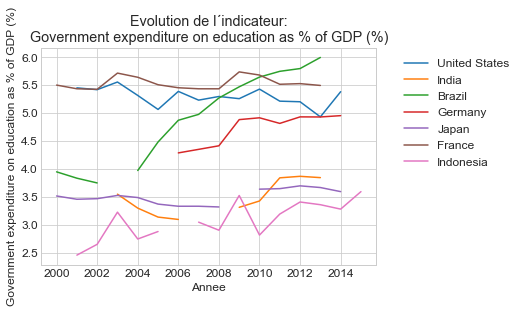

In [85]:
f_graphique_evolution_indicateur("Government expenditure on education as % of GDP (%)",df_pays_annee,liste_pays_classement[:5])

Demographie: La demographie de l´Inde est importante et en forte croissance.

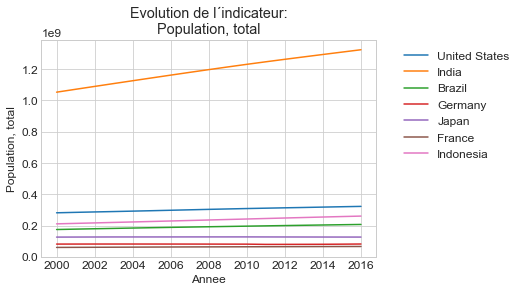

In [86]:
f_graphique_evolution_indicateur("Population, total",df_pays_annee,liste_pays_classement[:5])